# <span style="color:blue"> Welcome! Data Analytics Final (50 pts + 5 bonus pts)</span>

(That is, if you received 40/50 from the main exam and 5/5 from the bonus points, your total score would be 45/50.) 

<b>Background:</b> The Federal Open Market Committee (FOMC), a committee within the Federal Reserve System, meet about 8 times a year to make monetary policy decisions. Their meeting minutes are made public shortly after the meeting. There are 240 meetings from February 4, 1994 to December 13, 2023. 

<b>Question 1: Calculate negative sentiment score of one meeting (15 pts)</b>
  -  <font color='red'>Class material: Last example of 1.6</font>
 
<b>Question 2: Calculate negative sentiment scores of all March meetings from 1994 to 2023 (10 pts)</b>
 - 2.1. Calculate negative sentiment scores for each of these 30 txt minutes files. (+5)
 - 2.2 Plot the time series (+5)
 - <font color='red'>Class material: 1.6, plots</font>

<b>Question 3: Import external csv, collapse the negative sentiment variable to yearly frequency, analyze stock return sensitivity to negative sentiment at the yearly frequency (25 pts)</b>
 - 3.1 Import external csv files (+2)
 - 3.2 Calculate and print yearly negative sentiment (+10)
 - 3.3 Analyze stock return sensitivity to negative sentiment (+13)
 - <font color='red'>Class material: 2.3 (np.mean, conditioning array), 2.5 (conditioning array, for loops, regression, identify year from date)</font>

<b>Bonus question.</b>
 * <font color='red'>Class material: For loops. </font>

<b>Best of luck!</b>

<div class="alert-danger">
    <b>Honor Pledge:</b> Please print the following.
</div>

In [28]:
print("I affirm that I will not give or receive any unauthorized direct help on this final exam, and that all work will be my own: ")
import time
time.ctime() 

I affirm that I will not give or receive any unauthorized direct help on this final exam, and that all work will be my own: 


'Sat Apr 27 22:56:29 2024'

-----

In [29]:
name = "Nancy Xu"              # Enter your name
user = "xuaeh"              # Enter your BC username
print("Final submission for {} ({})".format(name,user))

Final submission for Nancy Xu (xuaeh)


Please make sure that you have created your own file <b>Final2024-user.ipynb</b> using "Save Notebook As" under the "File" dropdown.

In [30]:
# You might find them helpful
import math
import statistics
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats            # Basic package for basic univariate regressions
import statsmodels.api as statsmod           # More sophisticated package for univariate and multivariate regressions

In [31]:
def reg_m(y, x):
    X = np.hstack((np.ones((len(x),1)), x))     
    results = statsmod.OLS(y, X).fit()                
    return results

## <span style="color:blue"> 1. Calculate negative sentiment score of one meeting (15 pts)</span> 

<b>In this question:</b> You are asked to measure central bankers' negative sentiment in the <b>20200315.txt</b> meeting file [+12 pts], and then print the result out clearly [+3 pts]. 

<b>A few notes:</b> 
 - Definition of negative sentiment score from 1.6: $\mbox{Negative}_{20200315} = \frac{\mbox{Total number of Negative Words}_{20200315}}{\mbox{Total number of words}_{20200315}}\times 100$
 - Negative sentiment keyword list: "KEYWORD_NEGATIVE.txt"

<b>Professor trying to be helpful:</b> To save you time, please don't worry about stop words when calculating the total number of words and please simply apply whatever we did in class; that should be sufficient. To help get you started smoothly, I provide the NEXT THREE BLOCKS. Hope it is helpful.   

In [32]:
def Input(filename):
    f = open(filename, 'r', encoding="mbcs")  #some machines might use encoding="utf8"
    lines = f.readlines()
    lines = [l.strip() for l in lines]  # output will be a list of strings where each string corresponds to each line
    f.close()
    return lines

In [33]:
# Import the negative, positive, and stop words
list_neg = Input('KEYWORD_NEGATIVE.txt')

In [34]:
# Import the negative, positive, and stop words
filename = '20200315.txt'
FOMC = Input(filename)    # read each line as a string

In [35]:
# Your codes here [+12 pts]

# convert the list of sentences into a long string using join
FOMC_s = ' '.join(FOMC)
print(FOMC_s[0:5])
print(type(FOMC_s))

# split the string into a list of words using split
FOMC_w_raw = FOMC_s.split(' ')
print(FOMC_w_raw[0:5])
print(type(FOMC_w_raw))

# basic clearning (same as in 1.6); convert the words to uppercase, remove any periods or commas, remove any words that are equal to '--', ' ', or ''
FOMC_w = [w.upper().replace('.','').replace(',','').replace('(','').replace(')','').replace('*','').replace('-','').replace(':','') for w in FOMC_w_raw if w!= '--' and w!=' ' and w!='']
print(FOMC_w[0:5])
print(type(FOMC_w))

Minut
<class 'str'>
['Minutes', 'of', 'the', 'Federal', 'Open']
<class 'list'>
['MINUTES', 'OF', 'THE', 'FEDERAL', 'OPEN']
<class 'list'>


In [36]:
# count the number of words that appear in the dictionary of uncertainty words
# count the total number of words

count_all = 0 
count_neg = 0

for w in FOMC_w:
    if w in list_neg:
        count_neg += 1
    count_all += 1
    
negmention = count_neg/count_all*100
print(negmention)

2.9775676491298664


In [59]:
# Please complete and print the following sentence using print+format (rounding the percentage as specified) 
# [+3 pts] 
# During this FOMC meeting, XX of XXXX words (or {X.XX}%) are related to negative sentiment.
print("During this FOMC meeting, {} of {} words (or {:2.2f}%) are related to negative sentiment.".format(count_neg,count_all, negmention))

During this FOMC meeting, 139 of 7469 words (or 2.98%) are related to negative sentiment.


## <span style="color:blue"> 2. Calculate negative sentiment scores of all March meetings from 1994 to 2023 (10 pts)</span> 

<b>In this question:</b> You are asked to create a list or numpy array (at your choice) of negative sentiment scores, respectivesly. This list or array should contain <font color="red"><b>30 data points</b></font>, because there should only be one March meeting within each year. For your convenience, I provide a list named "MarchMeetings" that gives you the filenames of all March meetings from 1994 to 2023. 

Please produce and print out the list/array of 30 data points [+5 pts], and then show a time series plot of negative sentiment scores over time, with appropriate labels and x axis [+5 pts]. 

<b>Professor trying to be helpful:</b> You <b>don't</b> need to use for loops in order to receive full points in this question. 

In [38]:
MarchMeetings = ['19940322.txt','19950328.txt','19960326.txt','19970325.txt','19980331.txt','19990330.txt','20000321.txt','20010320.txt','20020319.txt','20030318.txt', '20040316.txt', 	'20050322.txt', 	'20060328.txt', 	'20070321.txt', 	'20080318.txt', 	'20090318.txt', 	'20100316.txt',  '20110315.txt',  '20120313.txt',  '20130320.txt',  '20140319.txt',  '20150318.txt', 	'20160316.txt',  '20170315.txt',  '20180321.txt',  '20190320.txt',  '20200315.txt',  '20210317.txt', '20220316.txt',  '20230322.txt']
print(MarchMeetings[0], MarchMeetings[-1], len(MarchMeetings))

19940322.txt 20230322.txt 30


In [39]:
# 2.1 Calculate and PRINT negative sentiment scores for these 30 files. [+5 pts]
# At the end of the block, we are expecting to see 30 numbers.
# Your codes here
COUNT_ALL = []
COUNT_NEG = []
NEGMENTION = []
for filename in MarchMeetings: 
    # import data
    FOMC = Input(filename) 
    FOMC_s = ' '.join(FOMC)
    FOMC_w_raw = FOMC_s.split(' ')
    FOMC_w = [w.upper().replace('.','').replace(',','').replace('(','').replace(')','').replace('*','').replace('-','').replace(':','') for w in FOMC_w_raw if w!= '--' and w!=' ' and w!='']

    # setup the count
    count_all = 0 
    count_neg = 0

    for w in FOMC_w:
        if w in list_neg:
            count_neg += 1
        count_all += 1
    
    # STORE RESUTLS
    COUNT_ALL.append(count_all)
    COUNT_NEG.append(count_neg)
    NEGMENTION.append(count_neg/count_all*100) 

In [42]:
NEGMENTION

[1.9361833952912018,
 1.856325492689129,
 2.0100502512562812,
 2.145284621920136,
 2.3921305611446457,
 1.5154942320741913,
 1.444043321299639,
 2.7454242928452577,
 2.0327868852459017,
 2.9096898160856437,
 1.7157490396927018,
 1.1288805268109126,
 1.2686567164179103,
 2.062606163552536,
 3.225270157938487,
 2.8534183082271145,
 2.283452580301416,
 1.5953481437304309,
 1.8721243852133904,
 1.9432405983503425,
 2.151452534338155,
 1.46295422369042,
 1.9760790431617263,
 1.2375961645668414,
 1.5757741847081392,
 1.791782514674081,
 2.9775676491298664,
 1.5272474835126693,
 1.6542404473438954,
 1.8610255723657785]

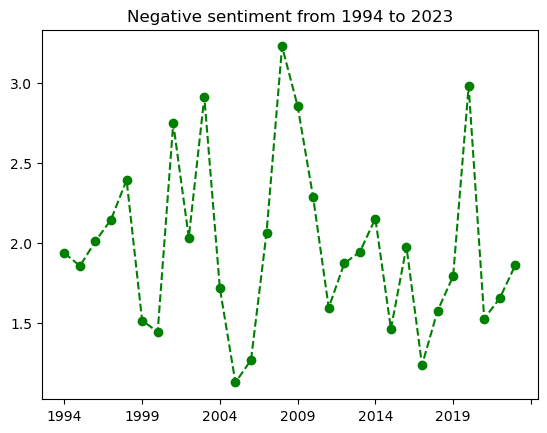

In [41]:
# 2.2 Plot the time series of negative sentiment from 1994 to 2023 [+5 pts]
plt.plot(NEGMENTION, 'go--')
positions = np.array([0, 5, 10, 15, 20, 25, 30])
labels = ['1994', '1999', '2004', '2009', '2014', '2019', '']
plt.xticks(positions, labels)          # change the x-axis 
plt.title('Negative sentiment from 1994 to 2023')
plt.show()

## <span style="color:blue"> 3. Import external csv, collapse the negative sentiment variable to yearly frequency from 1994 to 2023, analyze stock return sensitivity to negative sentiment (25pts)</span> 

<b>Sentiment data: "Q3.csv"</b>
  - Column 1 "date": Specific dates of 240 FOMC meetings from 1994 to 2023; that is, we no longer limit ourselves to March meetings.
  - Column 2 "NEGMENTION": Negative sentiment score during this meeting



<b>Asset price data: "Stock.csv"</b>
  - Column 1 "year": Year
  - Column 2 "StockRet": Annual stock return in percent


In [60]:
# 3.1 Demonstrate you know how to import external csv files. [+2 pts]
Q3DATA = np.genfromtxt("./Q3.csv", delimiter=',') 
Q3DATA = Q3DATA[1:, :]
Q3DATA.shape

(240, 2)

In [44]:
STOCK = np.genfromtxt("./Stock.csv", delimiter=',')  # ANNUAL RETURN IN PERCENT
STOCK = STOCK[1:, :]
STOCK.shape

(30, 2)

In [45]:
# 3.2 Calculate and print yearly negative sentiment. [+10]
# That is, take one year at a time, and calculate the AVERAGE of 
# all negative sentiment scores within this year.  

# Hint 1: You can use conditioning array to create subsample of each year, calculate average, and store it somewhere using for loop. 
# Hint 2: Notice the date variable is yyyymmdd, not in year; how do you generate a year from a date variable? 

In [46]:
# Your codes here
date= Q3DATA[:,0].reshape(240,1)
neg= Q3DATA[:,1].reshape(240,1)
neg.shape

(240, 1)

In [47]:
year = np.floor(date/10000)
neg_year = np.ones(30)

In [48]:
for i in list(range(1994,2024)):  # write conditioning array
    neg_year[i-1994] = np.mean(neg[year == i])

In [49]:
# Help with grading: please print out your yearly negative sentiment scores from 1994 to 2023. Expecting to see 30 numbers. 
neg_year

array([1.7117051 , 1.93623049, 1.73879927, 1.67407224, 2.23174571,
       1.60202987, 1.86245716, 3.03489575, 2.32398067, 1.95774731,
       1.52808261, 1.42898084, 1.57914263, 2.29999388, 2.81952621,
       2.28506941, 2.00469555, 2.0674759 , 2.12485235, 1.83501332,
       1.71341059, 1.84736382, 1.77999133, 1.530187  , 1.43154902,
       1.81367946, 2.14372835, 1.68602571, 2.09331759, 1.99747753])

In [ ]:
# 3.3 Analyze stock return sensitivity to negative sentiment. [+13]
# Regression setup [+8]
# Discussions [+5]

In [50]:
stock = STOCK[:,1].reshape(30,1)

In [51]:
# STOCK ~ neg
print(reg_m(stock,neg_year.reshape(30,1)).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     6.185
Date:                Sat, 27 Apr 2024   Prob (F-statistic):             0.0191
Time:                        23:03:42   Log-Likelihood:                -125.70
No. Observations:                  30   AIC:                             255.4
Df Residuals:                      28   BIC:                             258.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.4149     16.241      3.043      0.0

In [ ]:
# Your discussions in lockdown below (double click to start editing)

 -------------------

## Bonus question [+5] Obtain positive sentiment scores of the 30 March Meetings, and evaluate how sensitivity positive sentiment is to negative sentiment? 

In [52]:
# Your codes here.
list_pos = Input('KEYWORD_POSITIVE.txt')
COUNT_POS = []
POSMENTION = []
for filename in MarchMeetings: 
    # import data
    FOMC = Input(filename) 
    FOMC_s = ' '.join(FOMC)
    FOMC_w_raw = FOMC_s.split(' ')
    FOMC_w = [w.upper().replace('.','').replace(',','').replace('(','').replace(')','').replace('*','').replace('-','').replace(':','') for w in FOMC_w_raw if w!= '--' and w!=' ' and w!='']

    # setup the count
    count_pos = 0

    for w in FOMC_w:
        if w in list_pos:
            count_pos += 1
    
    # STORE RESUTLS
    COUNT_POS.append(count_pos)
    POSMENTION.append(count_pos/count_all*100) 

In [56]:
print(reg_m(np.array(POSMENTION).reshape(30,1),np.array(NEGMENTION).reshape(30,1)).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     2.994
Date:                Sat, 27 Apr 2024   Prob (F-statistic):             0.0946
Time:                        23:07:10   Log-Likelihood:               -0.59479
No. Observations:                  30   AIC:                             5.190
Df Residuals:                      28   BIC:                             7.992
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2141      0.180      6.751      0.0

In [57]:
# Please write a couple of sentences to discuss your findings.

 -----------------

### Great job! You have reached the end. Please <span style="color:red">save</span> your compiled notebook, <span style="color:red">click "File --> Log Out"</span> in order to submit your work. 

Keep in touch! 

Warmly, 
Professor Xu

In [58]:
import time
time.ctime()

'Sat Apr 27 23:10:07 2024'